# Data Import

In [1]:
####### Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('F:\Downloads\pd_speech_features.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mean_MFCC_2nd_coef         756 non-null    float64
 1   std_8th_delta_delta        756 non-null    float64
 2   std_9th_delta_delta        756 non-null    float64
 3   std_6th_delta_delta        756 non-null    float64
 4   std_8th_delta              756 non-null    float64
 5   std_6th_delta              756 non-null    float64
 6   std_10th_delta_delta       756 non-null    float64
 7   std_11th_delta_delta       756 non-null    float64
 8   std_9th_delta              756 non-null    float64
 9   app_LT_TKEO_std_7_coef     756 non-null    float64
 10  app_LT_entropy_log_9_coef  756 non-null    float64
 11  app_LT_entropy_log_3_coef  756 non-null    float64
 12  app_LT_entropy_log_8_coef  756 non-null    float64
 13  app_LT_TKEO_std_9_coef     756 non-null    float64

In [3]:
###### Convert class(outcome) to category

df['class'] = df['class'].astype('category')

In [4]:
###### Outcome Distribution

dfnew = df.groupby('class').sum()
dfnew.iloc[:, [-1]].groupby('class').sum()

,app_LT_TKEO_mean_6_coef
class,
0,40064.5286
1,110284.0706


In [5]:
###### Fix data types


In [6]:
# Pearson's correlation
#df.corr()

# Finding Attribute Correlation with Outcome Through Phi K Correlation

In [58]:
# Phi K correlations for all variables

! pip install phik
import phik
from phik import resources, report

n_jobs=None

pd.set_option('display.min_rows', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

# Plot matrix (sorted by class, last column)
dfphik = df.phik_matrix().sort_values(by=['class'], ascending=False)
dfphik

interval columns not set, guessing: ['mean_MFCC_2nd_coef', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_6th_delta_delta', 'std_8th_delta', 'std_6th_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'std_9th_delta', 'app_LT_TKEO_std_7_coef', 'app_LT_entropy_log_9_coef', 'app_LT_entropy_log_3_coef', 'app_LT_entropy_log_8_coef', 'app_LT_TKEO_std_9_coef', 'app_LT_entropy_log_7_coef', 'app_LT_TKEO_std_5_coef', 'app_LT_TKEO_mean_9_coef', 'meanPeriodPulses', 'app_LT_TKEO_mean_8_coef', 'app_LT_TKEO_mean_6_coef', 'class']


,mean_MFCC_2nd_coef,std_8th_delta_delta,std_9th_delta_delta,std_6th_delta_delta,std_8th_delta,...,app_LT_TKEO_mean_9_coef,meanPeriodPulses,app_LT_TKEO_mean_8_coef,app_LT_TKEO_mean_6_coef,class
class,0.574171,0.490900,0.469382,0.460492,0.456914,...,0.416687,0.416642,0.416236,0.415105,1.000000
mean_MFCC_2nd_coef,1.000000,0.270663,0.306135,0.210926,0.207759,...,0.480782,0.479913,0.476734,0.470978,0.574171
std_8th_delta_delta,0.270663,1.000000,0.784899,0.728670,0.925970,...,0.148237,0.182189,0.145911,0.145164,0.490900
std_9th_delta_delta,0.306135,0.784899,1.000000,0.757397,0.747804,...,0.221280,0.217851,0.221084,0.229841,0.469382
std_6th_delta_delta,0.210926,0.728670,0.757397,1.000000,0.708656,...,0.148947,0.106850,0.145665,0.104909,0.460492
std_8th_delta,0.207759,0.925970,0.747804,0.708656,1.000000,...,0.199470,0.049685,0.193771,0.183750,0.456914
std_6th_delta,0.170311,0.685651,0.727071,0.946876,0.711784,...,0.204926,0.000000,0.205522,0.208368,0.441982
std_10th_delta_delta,0.319900,0.715507,0.796140,0.712596,0.703620,...,0.262157,0.220370,0.256162,0.269662,0.439931
std_11th_delta_delta,0.326836,0.754205,0.746550,0.666337,0.704339,...,0.330604,0.270956,0.327284,0.339926,0.433677
std_9th_delta,0.159168,0.748287,0.940437,0.737690,0.752393,...,0.136091,0.114443,0.139188,0.197644,0.433373


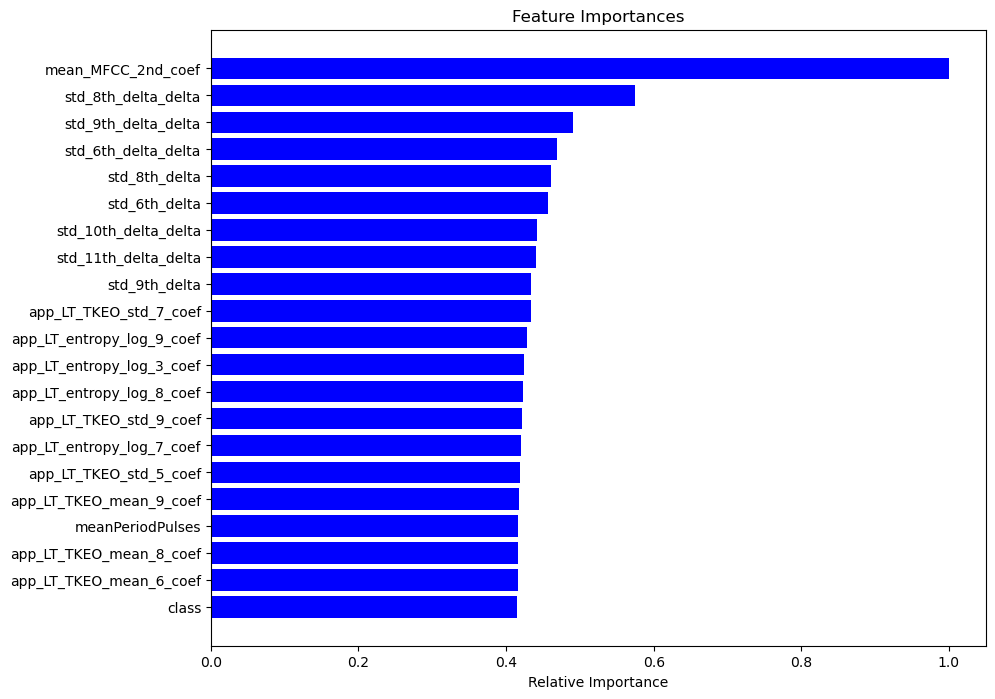

In [70]:
###### Rank Feature Importances According to Phi K Correlation
#fphik.iloc[:, [-1]].groupby('class').sum()
#fphik.drop(['class'])

feature_names = dfphik.columns
importances = dfphik['class']
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [8]:
###### Combo boxplot and histogram for continuous (I/R --> int64 and float64) variables

def boxplot_histogram (feature, figsize=(10,7), bins = None):
    sns.set(font_scale=2) 
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True,
                                           gridspec_kw = {"height_ratios": (0.25, 0.75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, orient = "h", showmeans=True, color='red') # mean value will be noted
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2, fit=norm)
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.axvline(feature.mode()[0], color='r', linestyle='dashed', linewidth=1); #Add mode to the histogram
    
#boxplot_histogram(df.mean_MFCC_2nd_coef)

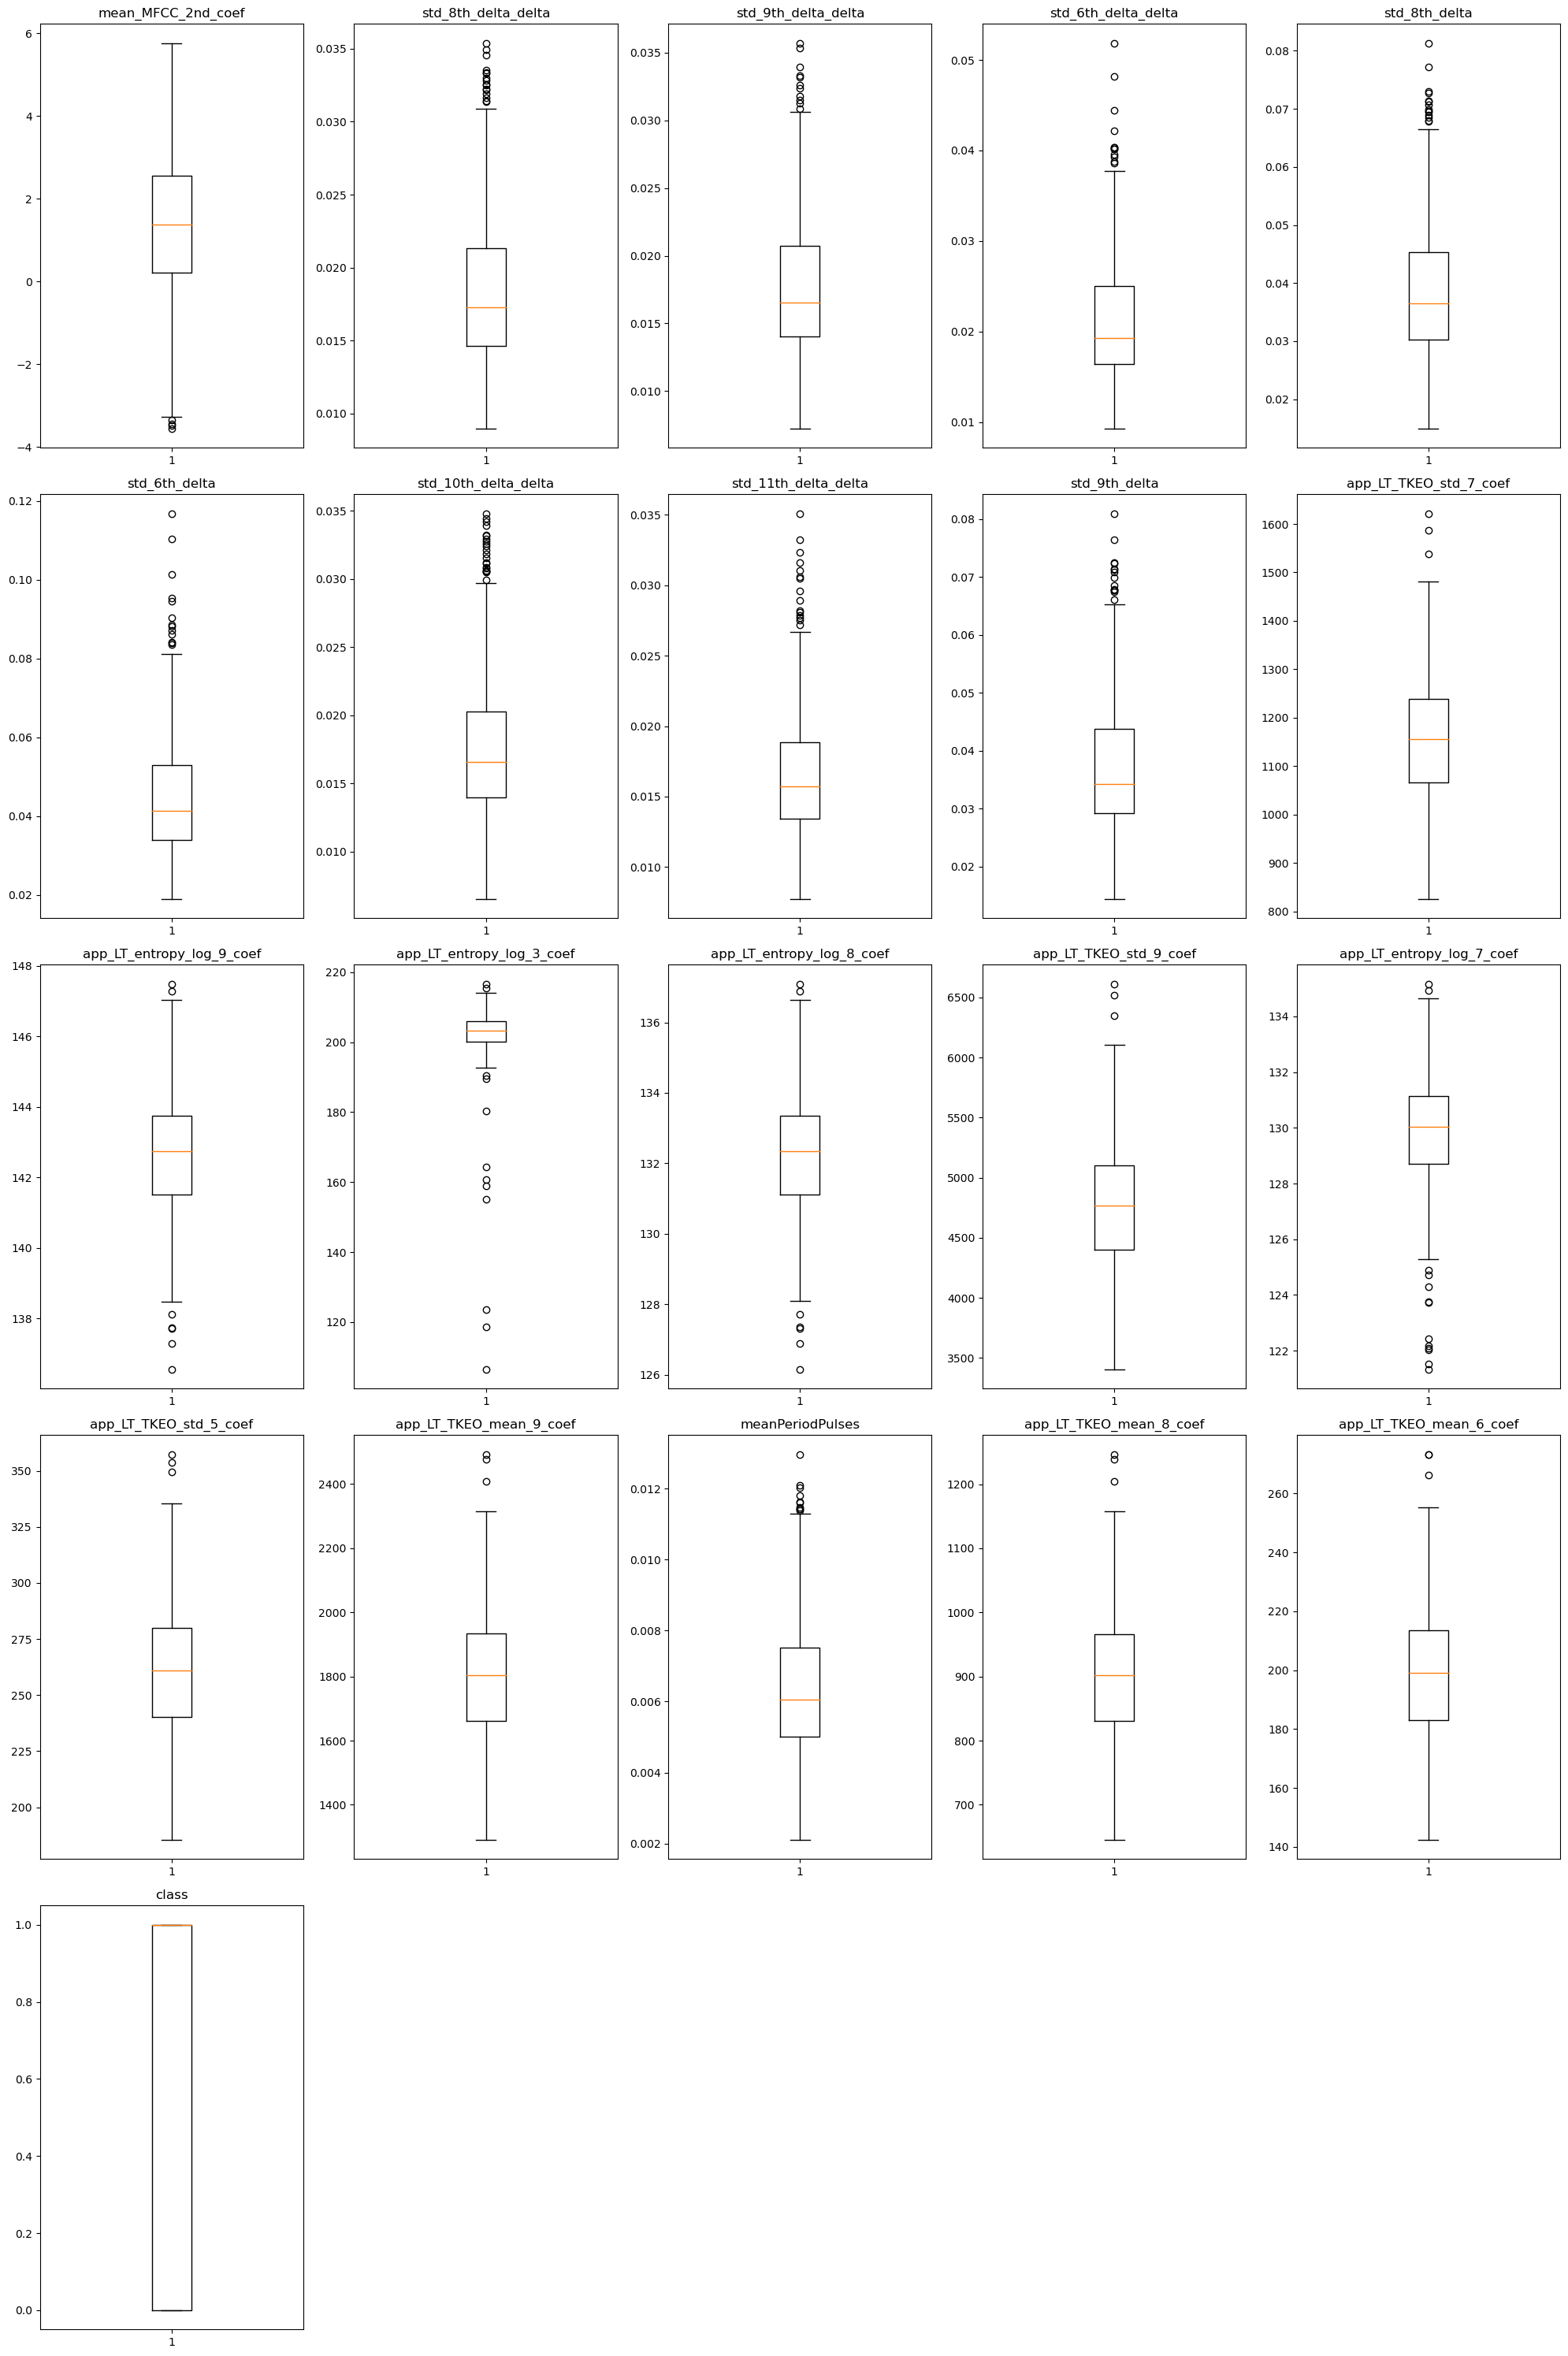

In [9]:
# Outlier detection using boxplots (for all I/R variables)

plt.figure(figsize=(20,30))

for i, variable in enumerate(df): #enumerate is a built-in function in python that allows you to keep track of the number of iterations (loops) in a loop
                     plt.subplot(5,5,i+1) #provides a way to plot multiple plots on a single figure
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

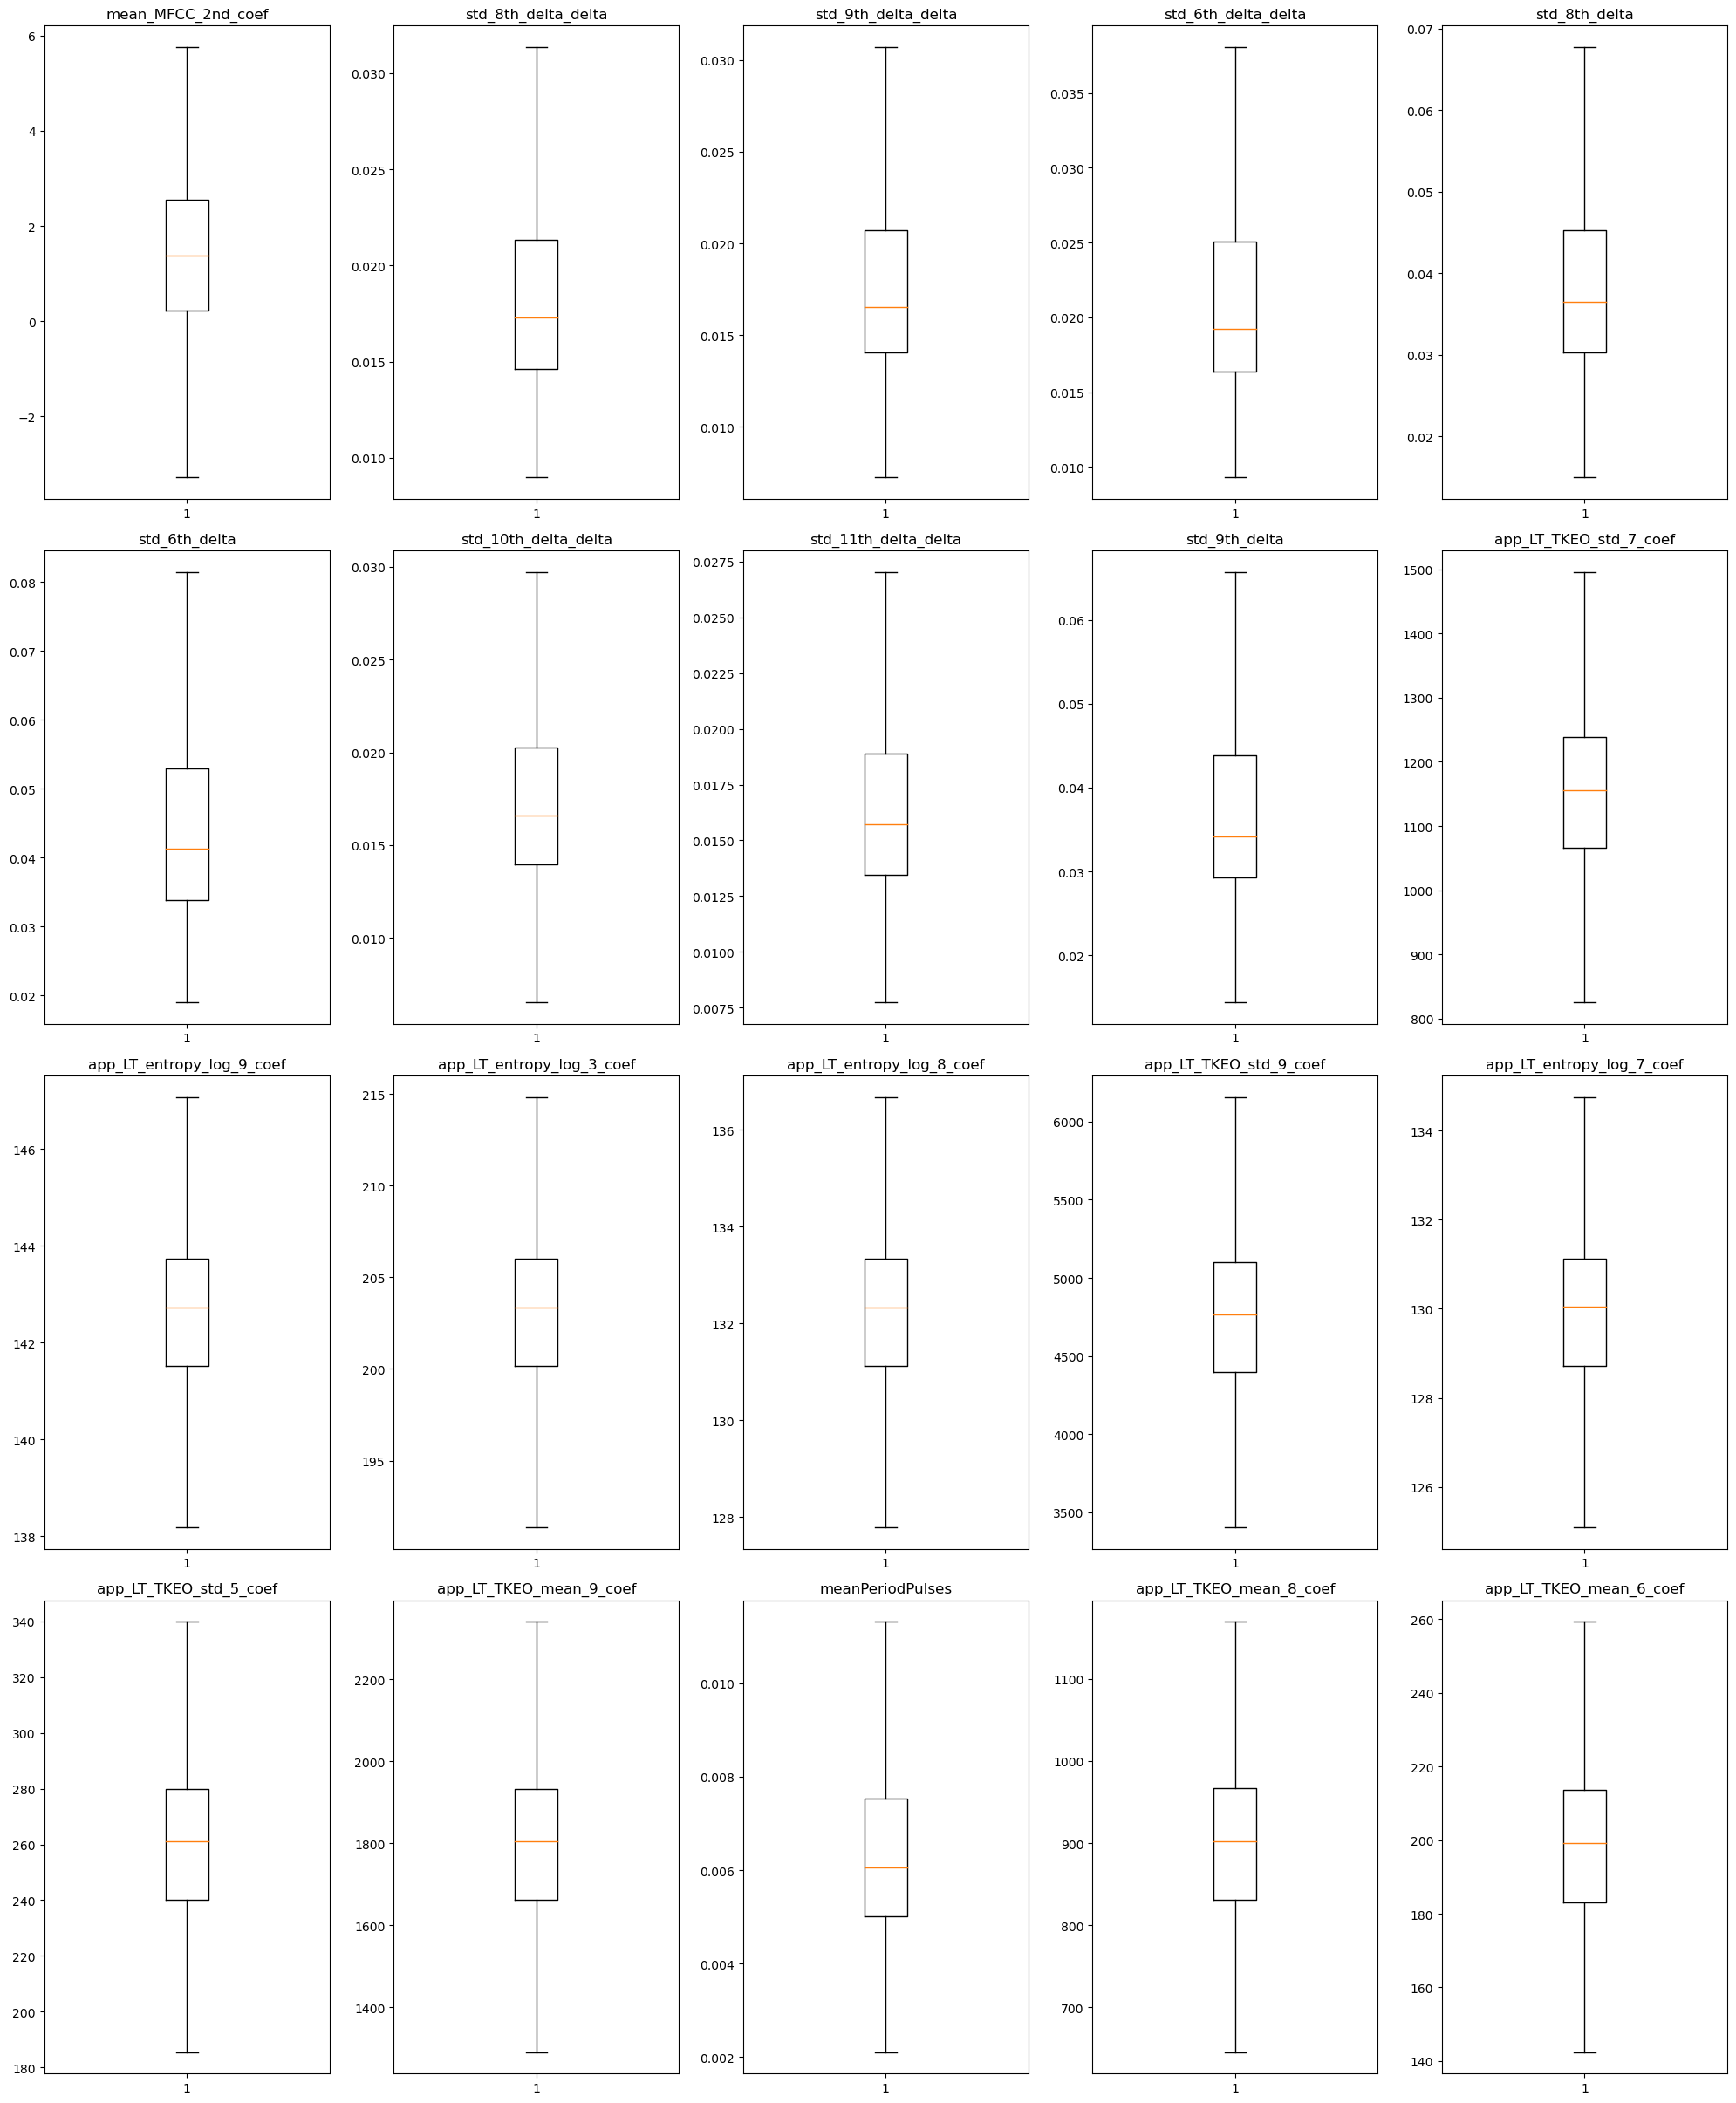

In [10]:
###### Treated outliers

def treat_outliers(df,col):
 
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                                                            
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Bivariate Analysis (Heatmap & Pairplot)

interval columns not set, guessing: ['mean_MFCC_2nd_coef', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_6th_delta_delta', 'std_8th_delta', 'std_6th_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'std_9th_delta', 'app_LT_TKEO_std_7_coef', 'app_LT_entropy_log_9_coef', 'app_LT_entropy_log_3_coef', 'app_LT_entropy_log_8_coef', 'app_LT_TKEO_std_9_coef', 'app_LT_entropy_log_7_coef', 'app_LT_TKEO_std_5_coef', 'app_LT_TKEO_mean_9_coef', 'meanPeriodPulses', 'app_LT_TKEO_mean_8_coef', 'app_LT_TKEO_mean_6_coef']


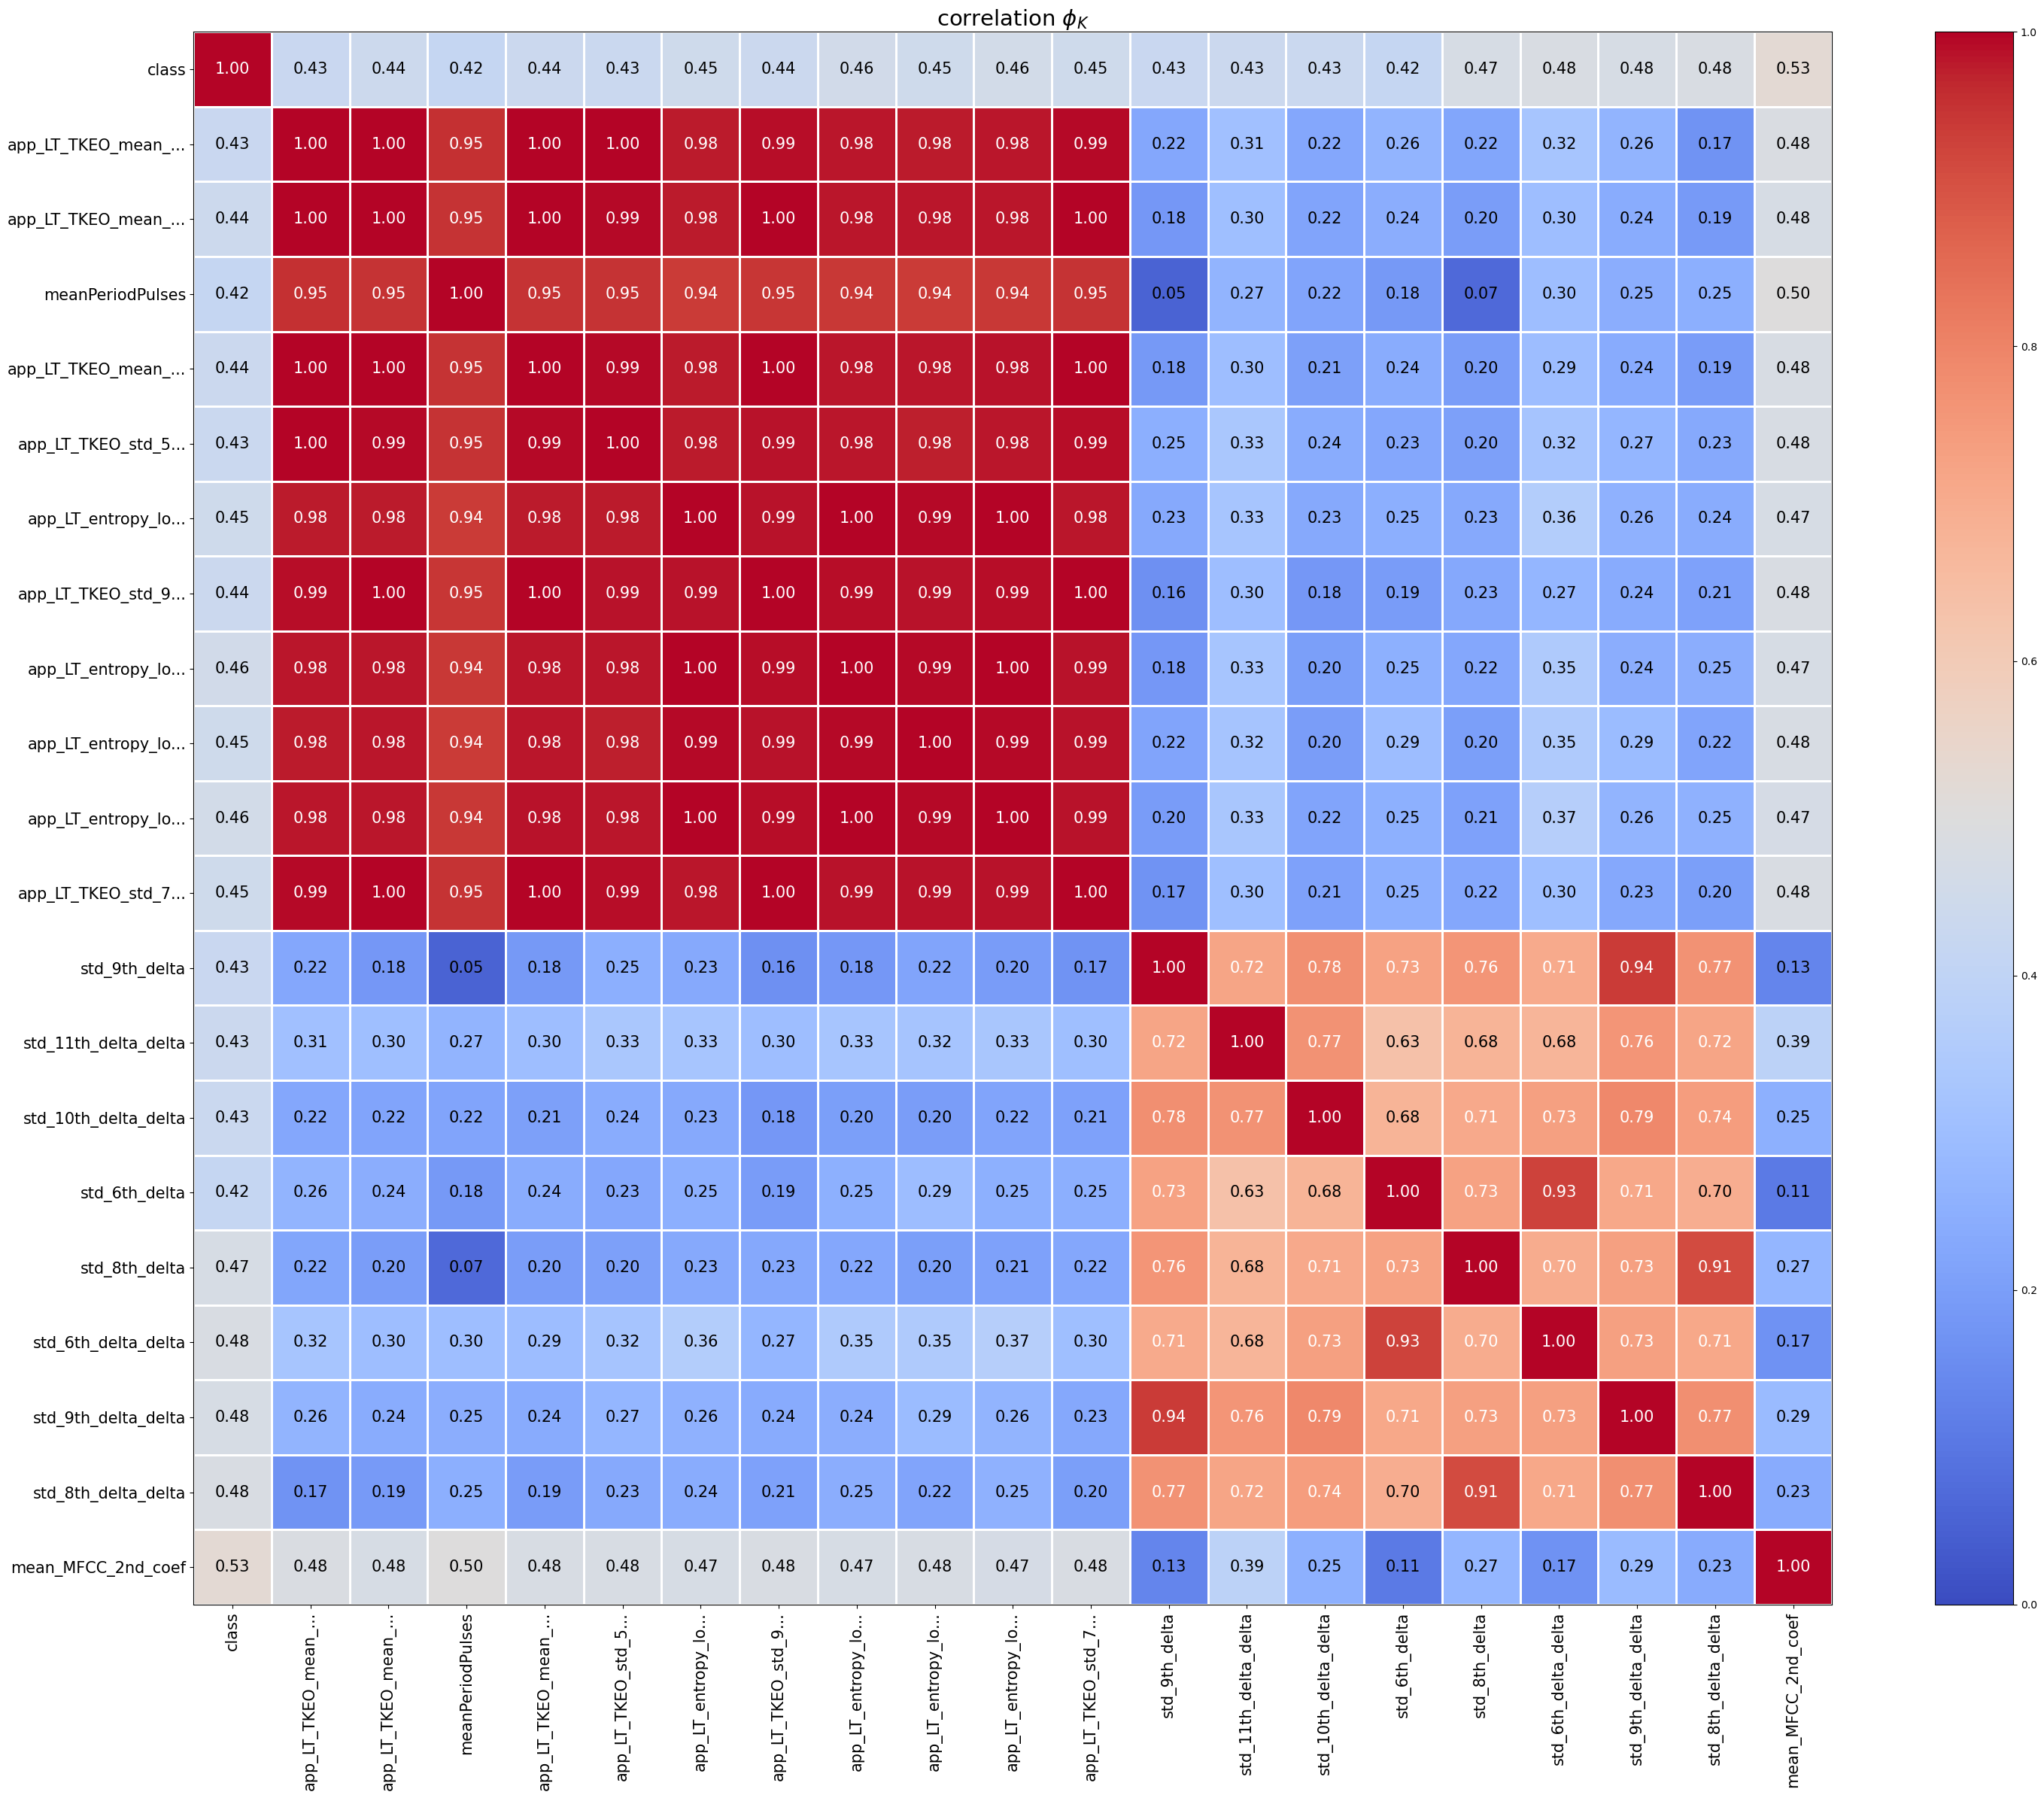

In [11]:
# Presenting Phi K data as a heatmap (credit: Jai Gupta)

from phik.report import plot_correlation_matrix
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(30, 24))
plt.tight_layout()

In [12]:
#sns.pairplot(df);

In [13]:
####### Supervised Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model

# Make copy of data
data = df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   mean_MFCC_2nd_coef         756 non-null    float64 
 1   std_8th_delta_delta        756 non-null    float64 
 2   std_9th_delta_delta        756 non-null    float64 
 3   std_6th_delta_delta        756 non-null    float64 
 4   std_8th_delta              756 non-null    float64 
 5   std_6th_delta              756 non-null    float64 
 6   std_10th_delta_delta       756 non-null    float64 
 7   std_11th_delta_delta       756 non-null    float64 
 8   std_9th_delta              756 non-null    float64 
 9   app_LT_TKEO_std_7_coef     756 non-null    float64 
 10  app_LT_entropy_log_9_coef  756 non-null    float64 
 11  app_LT_entropy_log_3_coef  756 non-null    float64 
 12  app_LT_entropy_log_8_coef  756 non-null    float64 
 13  app_LT_TKEO_std_9_coef     756 non-

In [14]:
X = data.drop('class', axis=1) # Features
y = data['class'].astype('int64') # Target variable (or outcome)
# converting target to integers - since some functions might not work with object/category type
#X.info()
#y

# Feature Engineering (SMOTE Resampling)

Counter({0: 378, 1: 378})
Counter({0: 378, 1: 378})


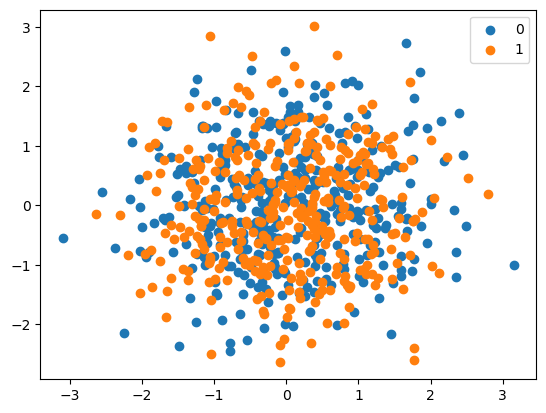

In [15]:
###### SMOTE (Resampling Technique)

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=756, n_features=20, n_redundant=0,
 n_clusters_per_class=2, weights=[0.5] , flip_y=0.001)

# summarize class distribution
counter = Counter(y)
print(counter)

#for label, _ in counter.items():
# row_ix = where(y == label)[0]
# pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
#pyplot.legend()
#pyplot.show()

# define pipeline
over = SMOTE(sampling_strategy='auto')
under = RandomUnderSampler(sampling_strategy='auto')
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

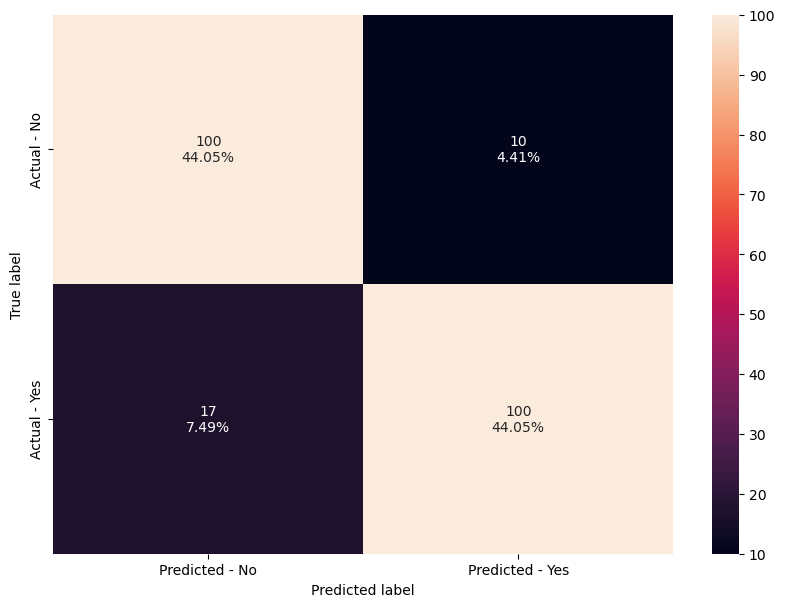

In [17]:
###### Defines confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Data Splitting

In [16]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(529, 20) (227, 20)


DecisionTreeClassifier(class_weight={0: 0.65, 1: 0.35}, random_state=1)

In [19]:
###### Remove class (outcome) as attribute
column_names = list(data.columns)
column_names.remove('class')  # As this is the DV                
feature_names = column_names
print(feature_names)

['mean_MFCC_2nd_coef', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_6th_delta_delta', 'std_8th_delta', 'std_6th_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'std_9th_delta', 'app_LT_TKEO_std_7_coef', 'app_LT_entropy_log_9_coef', 'app_LT_entropy_log_3_coef', 'app_LT_entropy_log_8_coef', 'app_LT_TKEO_std_9_coef', 'app_LT_entropy_log_7_coef', 'app_LT_TKEO_std_5_coef', 'app_LT_TKEO_mean_9_coef', 'meanPeriodPulses', 'app_LT_TKEO_mean_8_coef', 'app_LT_TKEO_mean_6_coef']


In [23]:
###### Libraries for different classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
data_2=df
X = data_2.drop('class',axis=1)
y = data_2['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

# random state controls shuffling before applying split; shuffling is default; stratify allows shuffle by class
print(X_train.shape, X_test.shape)

(529, 20) (227, 20)


In [30]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [18]:
##  Function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

Recall on training set :  1.0
Recall on test set :  0.8547008547008547


# Required Supervised Learning Models

Accuracy on training set :  1.0
Accuracy on test set :  0.7577092511013216
Recall on training set :  1.0
Recall on test set :  0.8579881656804734
Precision on training set :  1.0
Precision on test set :  0.8238636363636364
F1-Score on training set :  1.0
F1-Score on test set :  0.8405797101449276


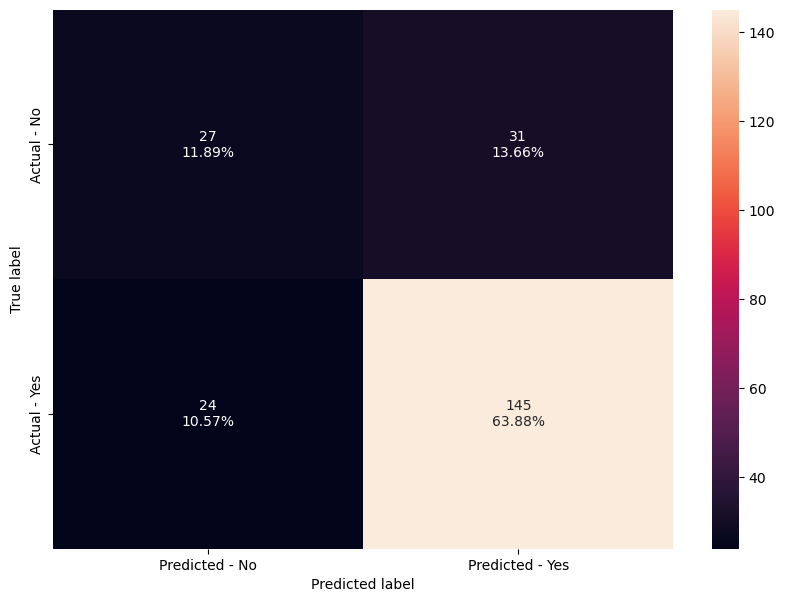

In [31]:
###### Decision Tree Model
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.65,1:0.35},random_state=1)

# Parameters:
parameters = {'max_depth': np.arange(2,10),
              'criterion': ['entropy','gini'],
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1],
              'max_features': ['log2','sqrt']
             }

# Scoring method used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the optimal combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm
dtree_estimator.fit(X_train, y_train)
    
# Fit the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

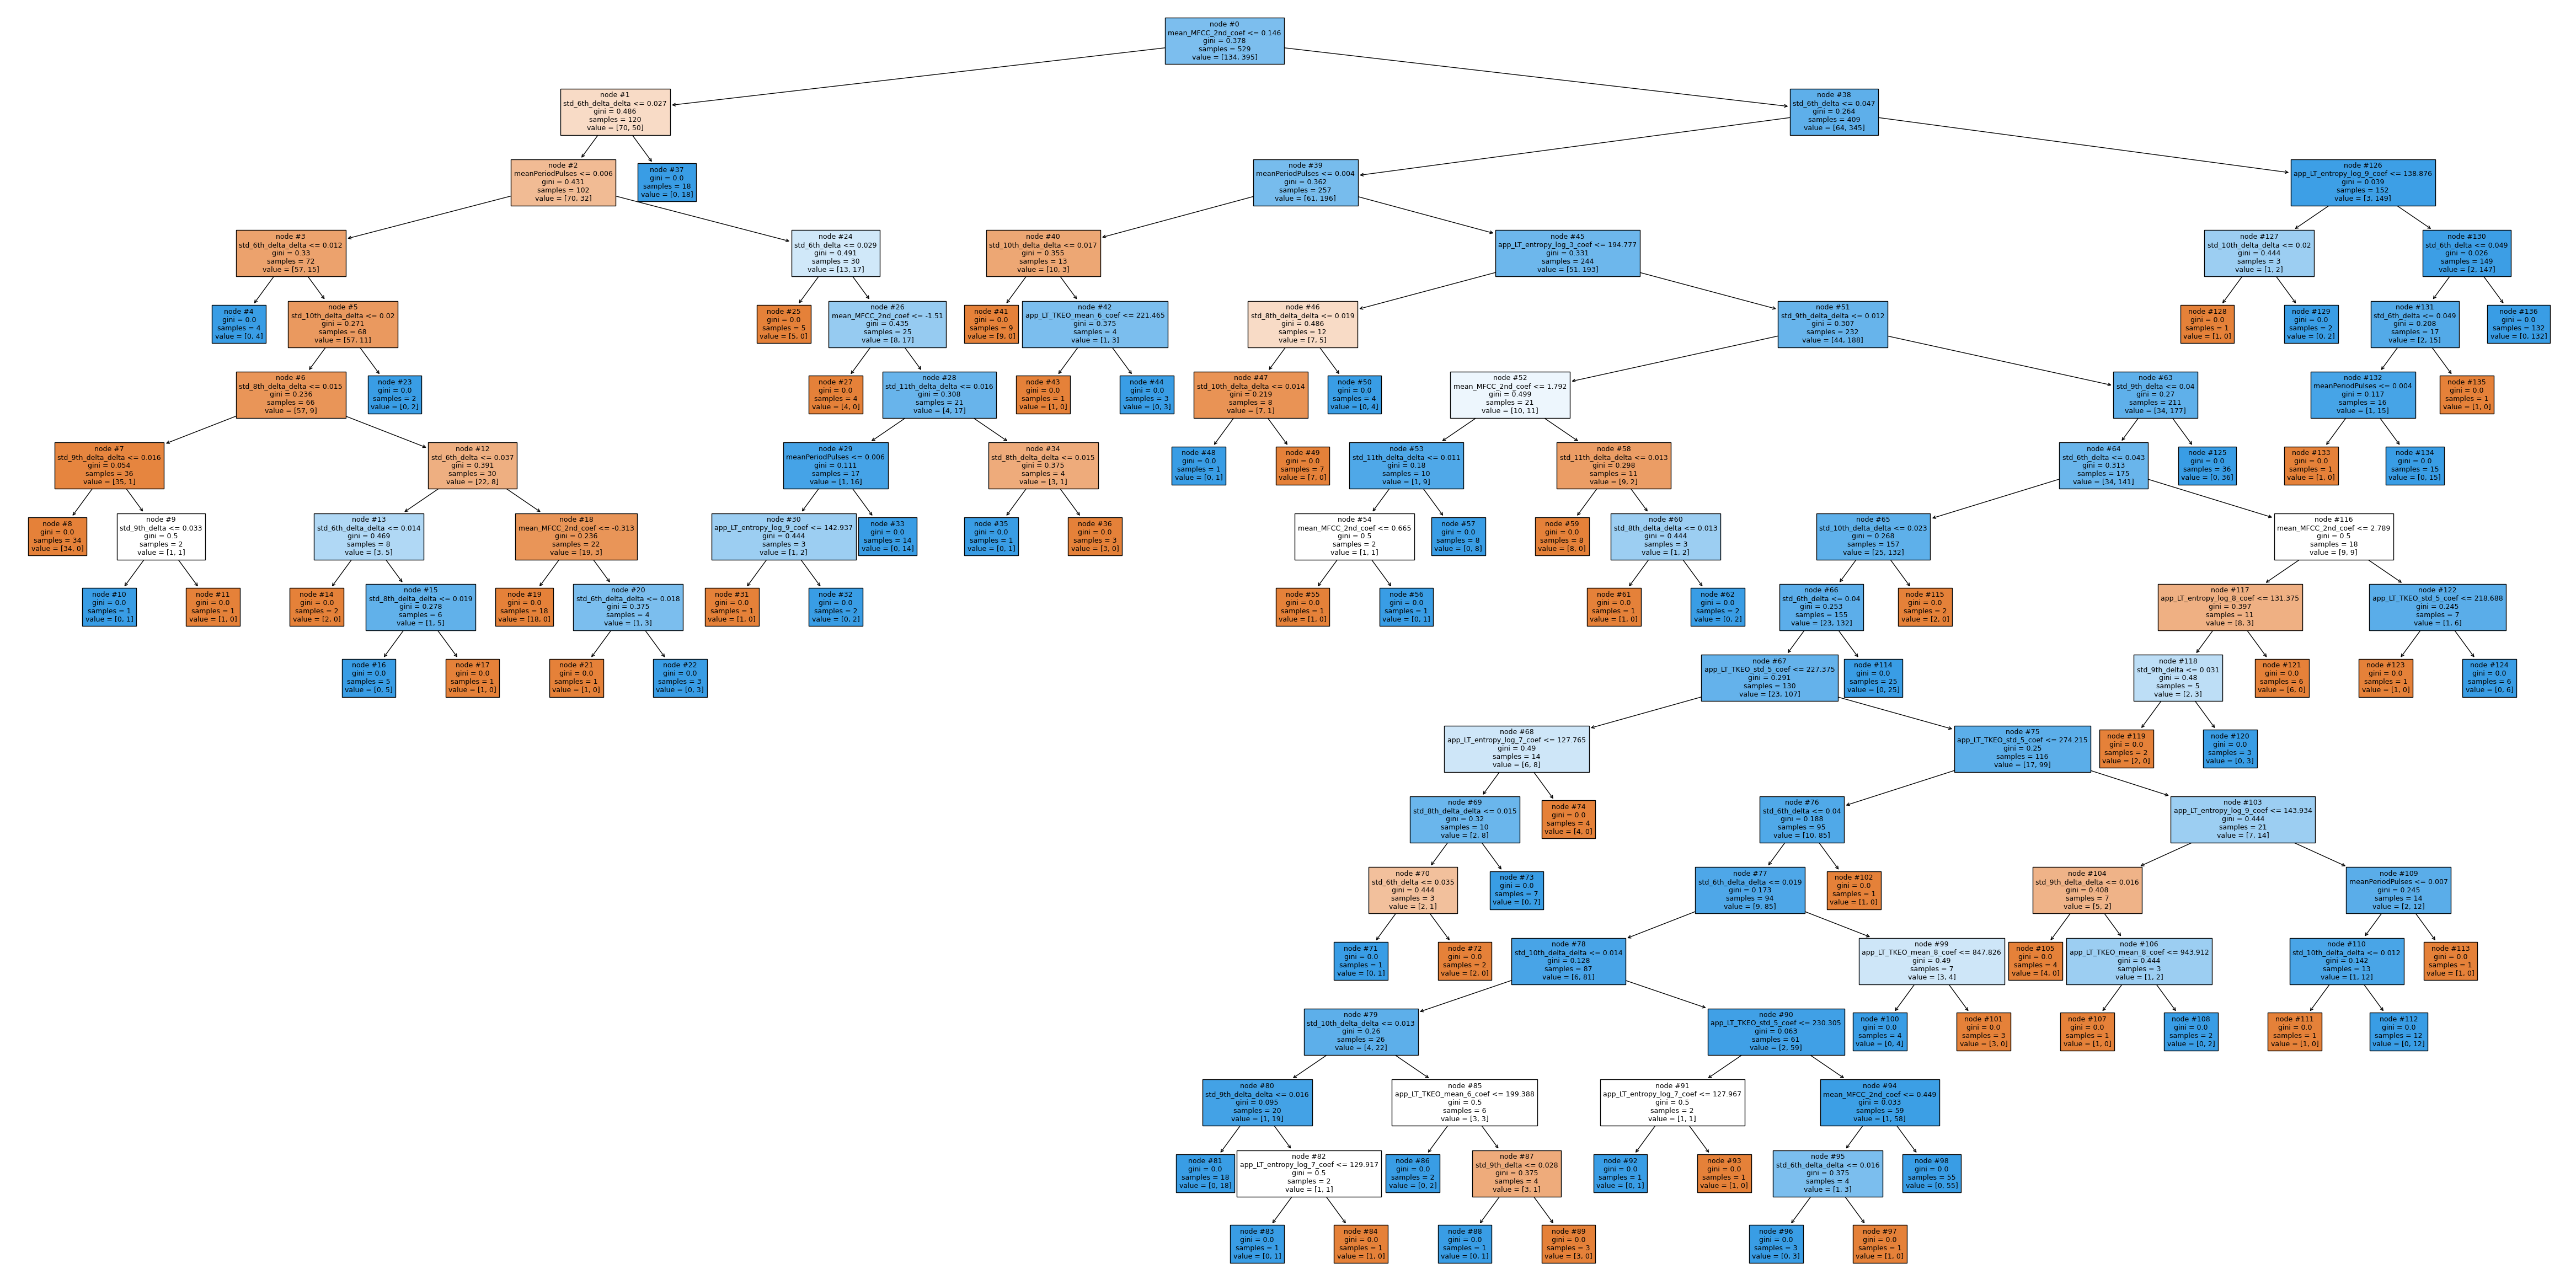

In [49]:
plt.figure(figsize=(60,30))
out = tree.plot_tree(d_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [22]:
# Gini importance
#print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

NameError: name 'estimator' is not defined

Accuracy on training set :  0.7466918714555766
Accuracy on test set :  0.7444933920704846
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.7466918714555766
Precision on test set :  0.7444933920704846
F1-Score on training set :  0.854978354978355
F1-Score on test set :  0.8535353535353536
CPU times: total: 9.11 s
Wall time: 27.1 s


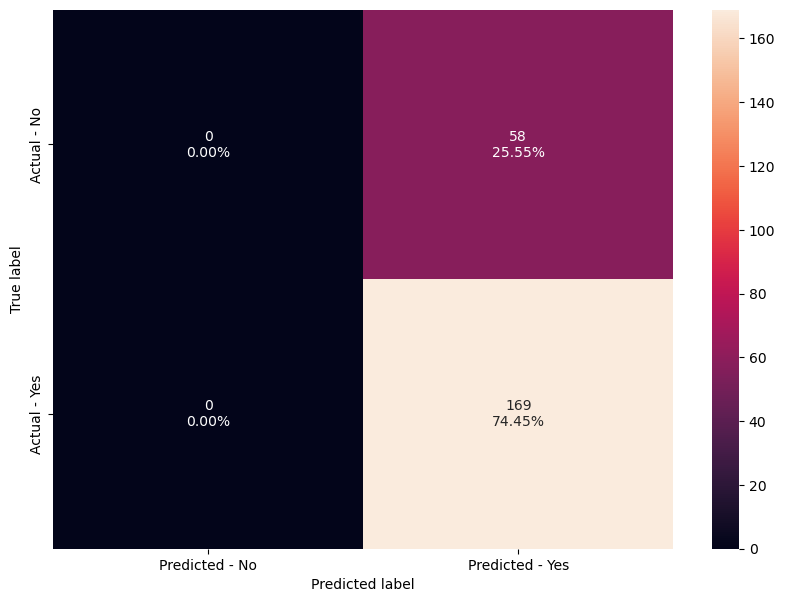

In [32]:
%%time
####### Tuned Decision Tree Classifier

dtree_tuned = DecisionTreeClassifier(class_weight={0:0.65,1:0.35},random_state=1)

parameters = {
            
            'criterion': ['entropy','gini','log_loss'],
            'splitter': ['best','random'],
            'max_depth': np.arange(2,10),
            'min_samples_leaf': [5, 7, 10, 15],
            'max_features': ['log2','sqrt'],
            'max_leaf_nodes' : [2, 3, 5, 10, 15], #(makes model predict all class 1,but prevents overfitting so can't neglect)
            'min_impurity_decrease': [0.0001,0.001,0.01]
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train) #trains the model

get_metrics_score(dtree_tuned)

make_confusion_matrix(dtree_tuned,y_test)

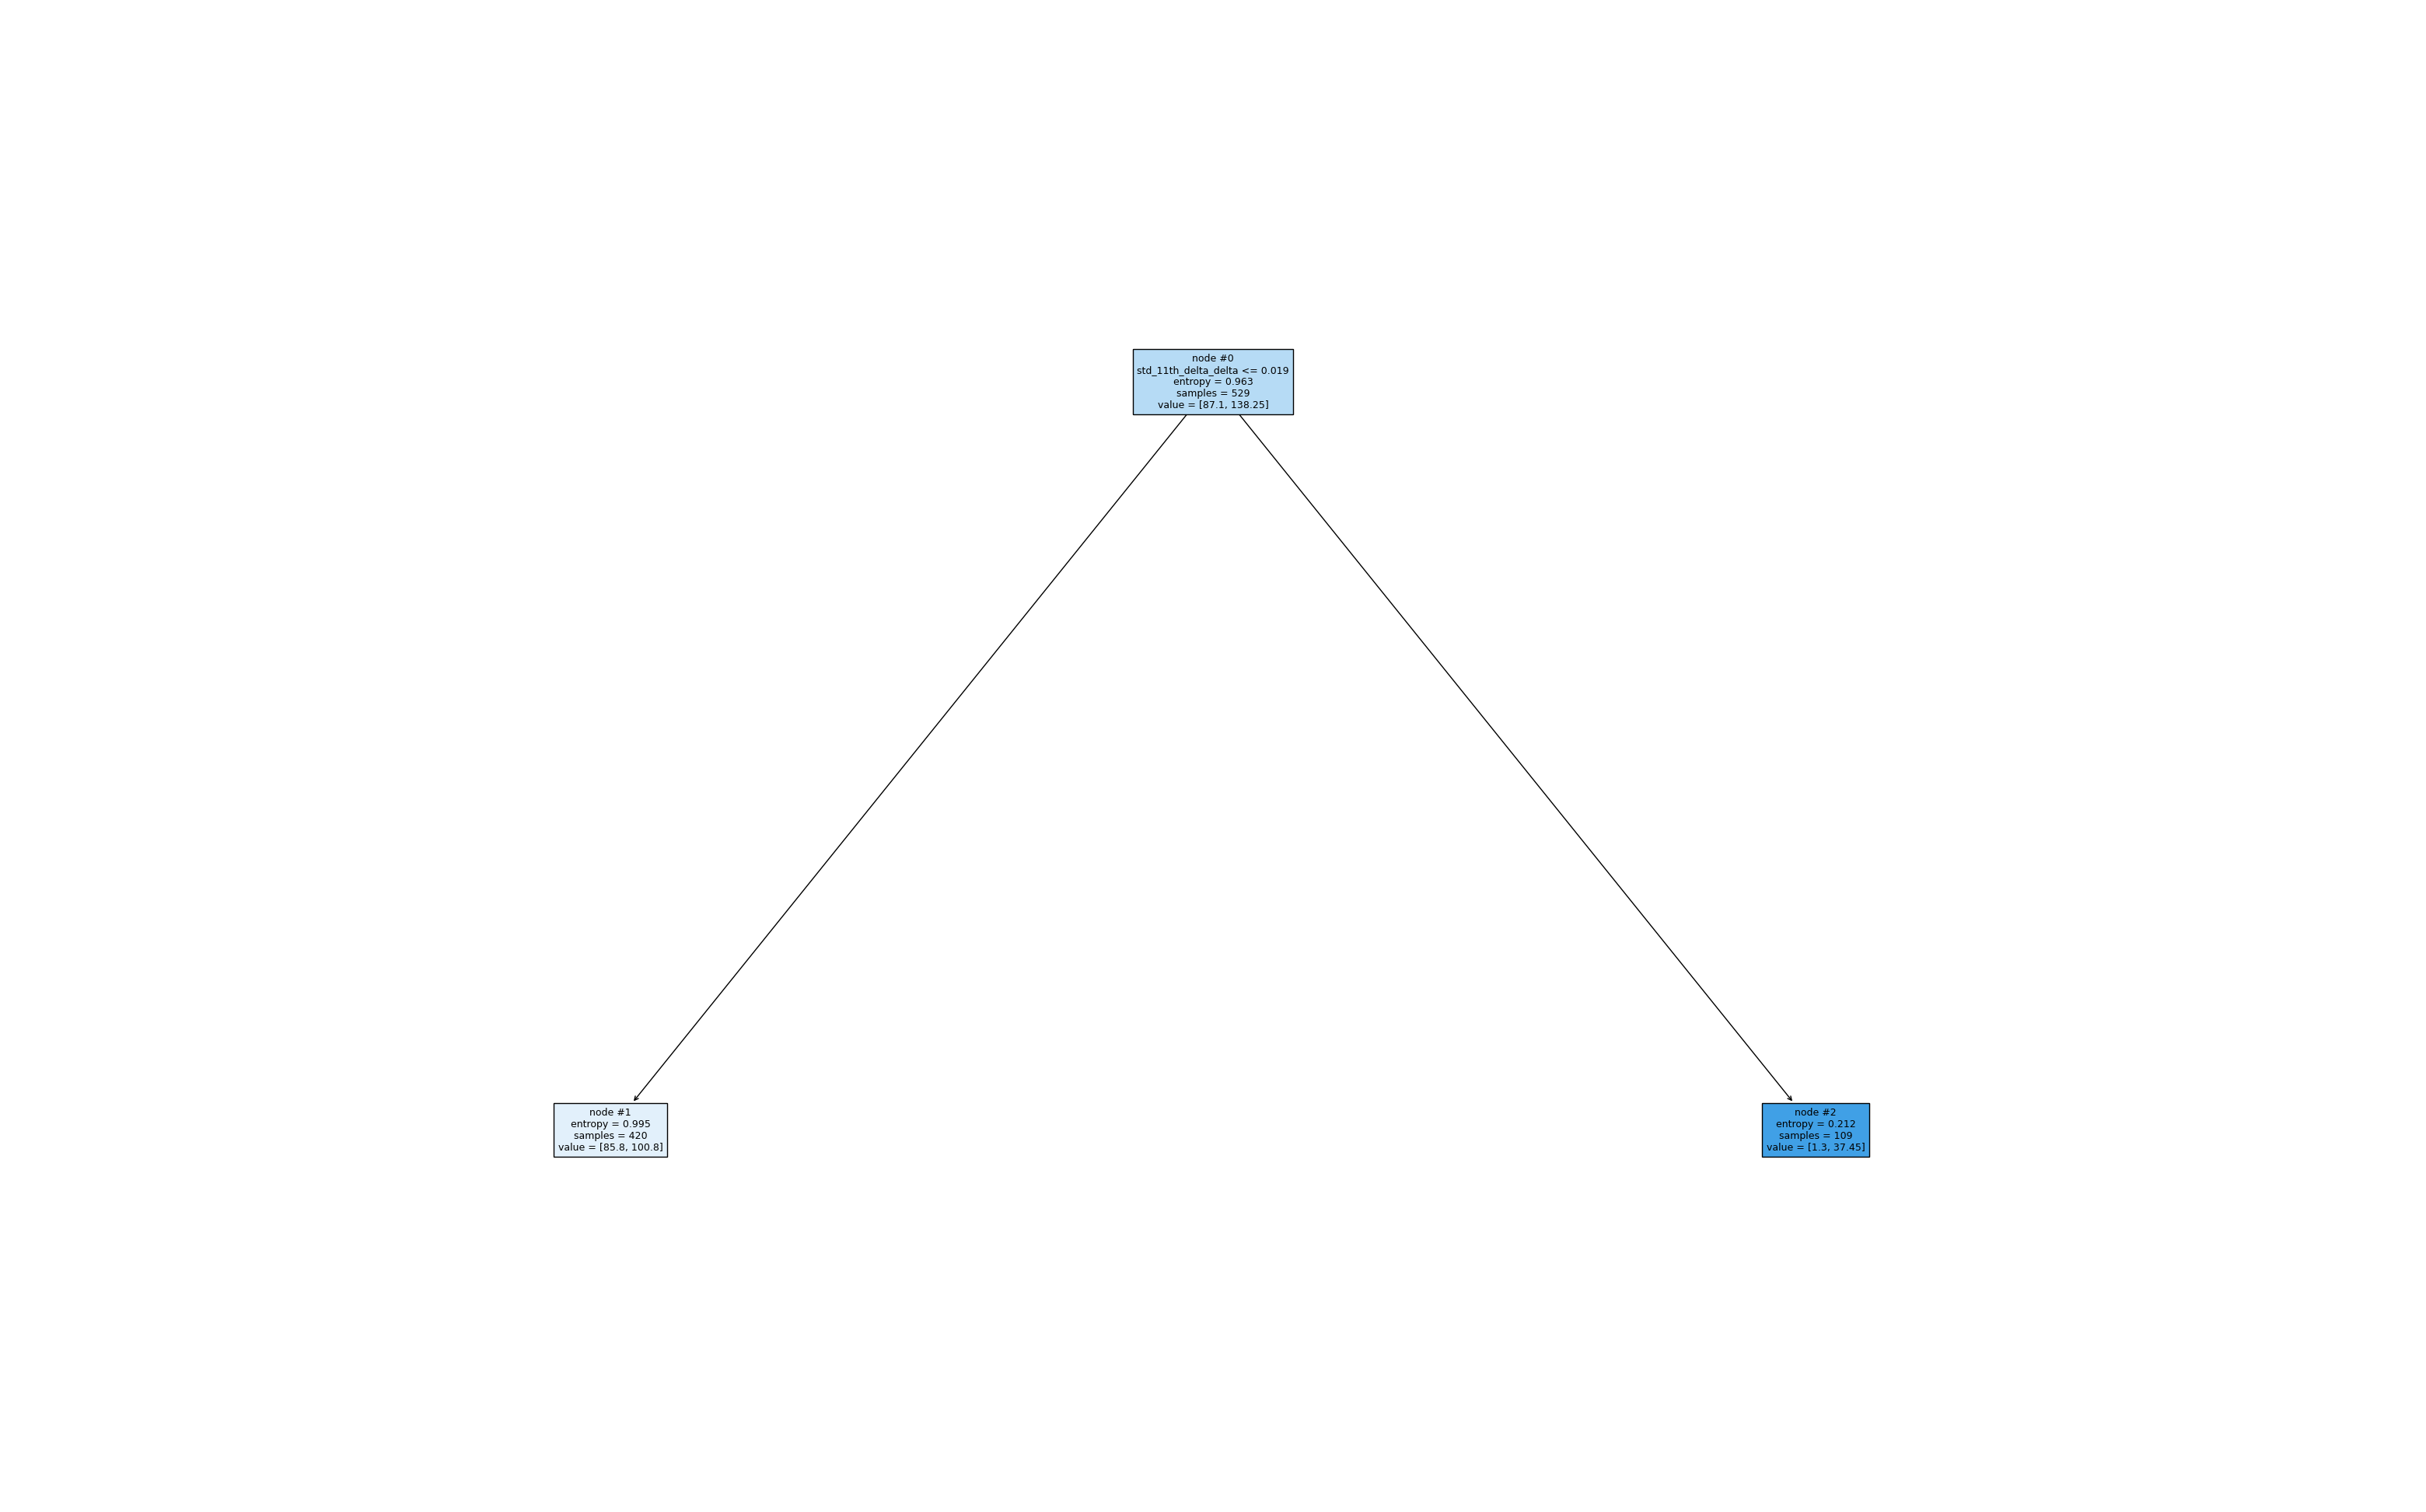

In [33]:
plt.figure(figsize=(40,25))
out = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

Accuracy on training set :  1.0
Accuracy on test set :  0.8149779735682819
Recall on training set :  1.0
Recall on test set :  0.9467455621301775
Precision on training set :  1.0
Precision on test set :  0.8290155440414507
F1-Score on training set :  1.0
F1-Score on test set :  0.8839779005524862


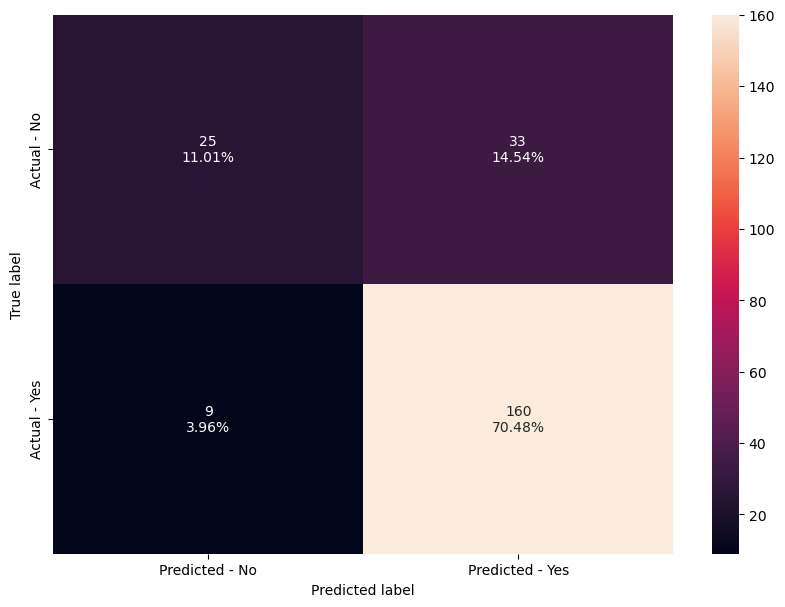

In [36]:
###### Random Forest Model
# Fit the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(rf_estimator)

# Create the confusion matrix
make_confusion_matrix(rf_estimator,y_test)

In [ ]:
%%time 
# captures time it takes to run this block of code
###### Tuned Random Forest Classifier

n_jobs = None

# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.65,1:0.35},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

Accuracy on training set :  0.9905482041587902
Accuracy on test set :  0.7973568281938326
Recall on training set :  0.9896103896103896
Recall on test set :  0.8212290502793296
Precision on training set :  0.9973821989528796
Precision on test set :  0.9130434782608695
F1-Score on training set :  0.9934810951760106
F1-Score on test set :  0.8647058823529412


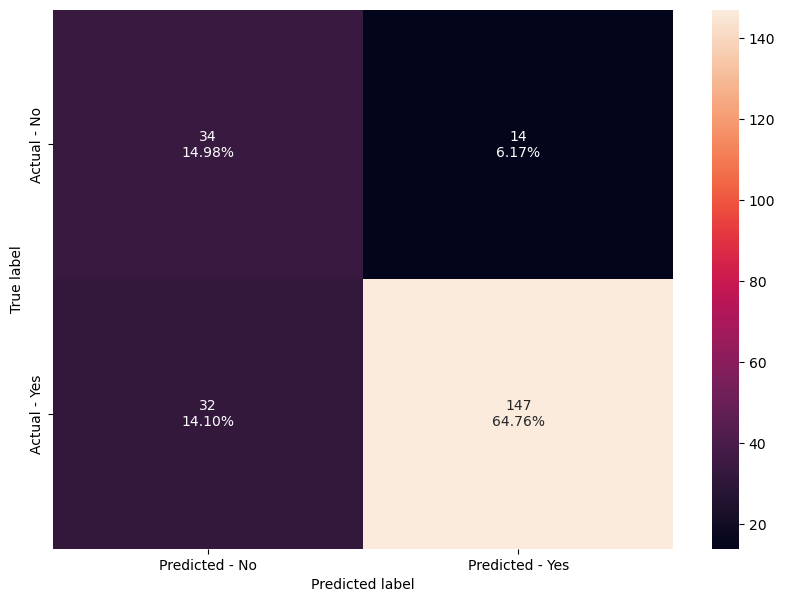

In [71]:
###### Bagging Classifier
# Fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(bagging_classifier)

# Create the confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

In [ ]:
%%time
###### Tuned Bagging Classifier

bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(X_train, y_train)

get_metrics_score(bagging_tuned)

make_confusion_matrix(bagging_tuned,y_test)

In [ ]:
# Identify the models to compare
models = [d_tree, dtree_tuned, rf_estimator, rf_tuned, bagging_classifier, bagging_tuned]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest', 'Tuned Random Forest',
                                          'Bagging Classifier','Tuned Bagging Classifier'], 'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'F1_Train':f1_train, 'F1_Test':f1_test})

#Sort models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

# Logistic Regression

Accuracy on training set :  0.7901701323251418
Accuracy on test set :  0.801762114537445
Recall on training set :  0.9428571428571428
Recall on test set :  0.9050279329608939
Precision on training set :  0.8030973451327433
Precision on test set :  0.8526315789473684
F1-Score on training set :  0.867383512544803
F1-Score on test set :  0.8780487804878049


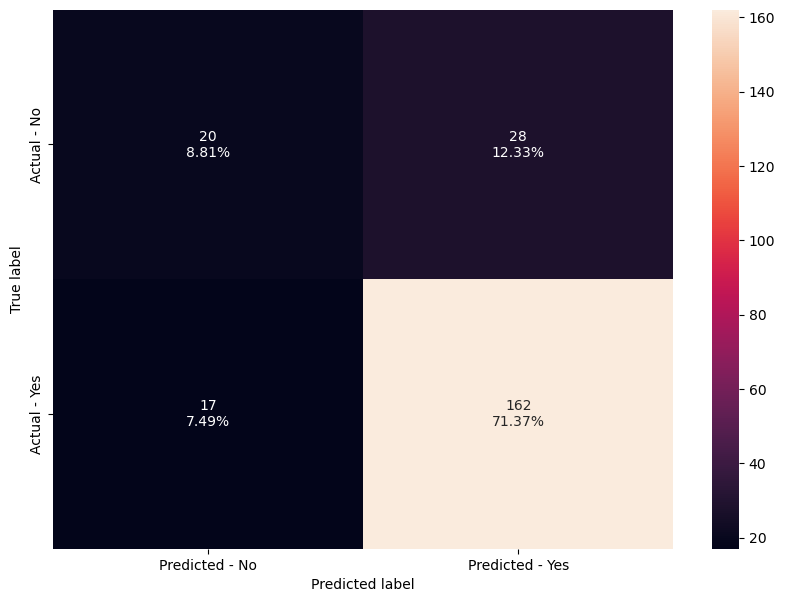

In [50]:
###### Logistic Regression
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression(solver='lbfgs', multi_class='multinomial')

#grid_obj = GridSearchCV(log_regression, parameters, scoring=scorer,cv=5)
#grid_obj = grid_obj.fit(X_train, y_train)

#log_regression = grid_obj.best_estimator_

log_regression.fit(X_train, y_train)

get_metrics_score(log_regression)

make_confusion_matrix(log_regression,y_test)

# Boosting Models

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn import datasets
df = pd.read_csv('F:\Downloads\pd_speech_features.csv')
data = df

# Split Data into Train and Test Sets
X = data.drop('class',axis=1)    # Features
y = data['class'].astype('int64') # Labels (Target or Outcome Variable)
# converting target to integers - since some functions might not work with bool type
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(529, 20) (227, 20)


Accuracy on training set :  0.9017013232514177
Accuracy on test set :  0.8149779735682819
Recall on training set :  0.9636363636363636
Recall on test set :  0.8770949720670391
Precision on training set :  0.9070904645476773
Precision on test set :  0.8870056497175142
F1-Score on training set :  0.9345088161209069
F1-Score on test set :  0.8820224719101124
CPU times: total: 312 ms
Wall time: 291 ms


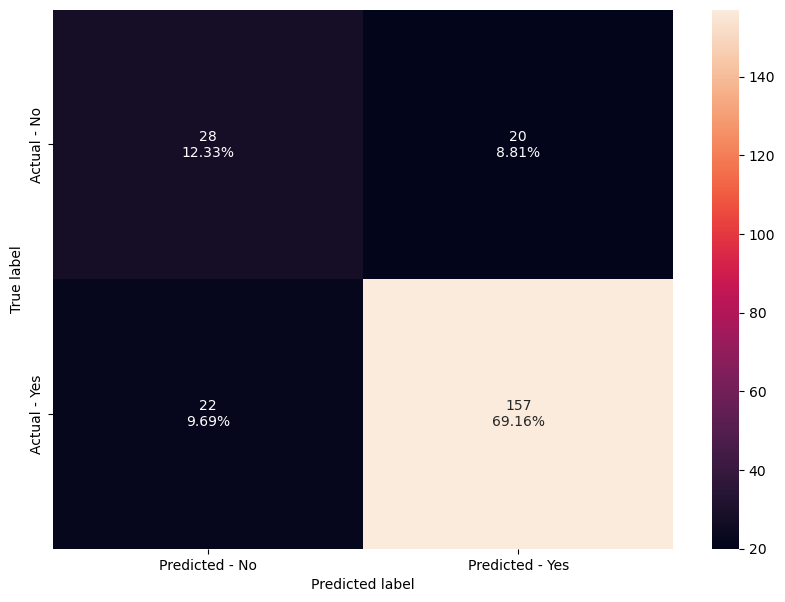

In [39]:
%%time
###### AdaBoost

adaboost=AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

get_metrics_score(adaboost)

make_confusion_matrix(adaboost,y_test)

Accuracy on training set :  0.8733459357277883
Accuracy on test set :  0.8281938325991189
Recall on training set :  0.9584415584415584
Recall on test set :  0.9050279329608939
Precision on training set :  0.8785714285714286
Precision on test set :  0.8804347826086957
F1-Score on training set :  0.9167701863354037
F1-Score on test set :  0.8925619834710744
CPU times: total: 21.1 s
Wall time: 20.9 s


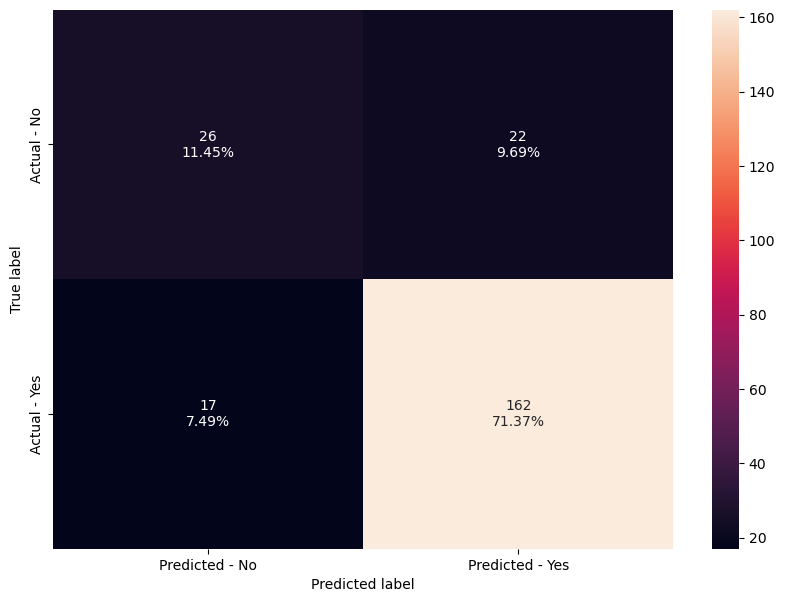

In [40]:
%%time
###### Tuned AdaBoost

adaboost_tuned = AdaBoostClassifier(random_state=1)

parameters = {'n_estimators': np.arange(10,100,10),                
              'learning_rate': [1, 0.1, 0.5, 0.01],                
              }

scorer = metrics.make_scorer(metrics.r2_score)

grid_obj = GridSearchCV(adaboost_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

adaboost_tuned = grid_obj.best_estimator_
 
adaboost_tuned.fit(X_train, y_train)

get_metrics_score(adaboost_tuned)

make_confusion_matrix(adaboost_tuned,y_test)

Accuracy on training set :  0.9735349716446124
Accuracy on test set :  0.8458149779735683
Recall on training set :  1.0
Recall on test set :  0.8994413407821229
Precision on training set :  0.9649122807017544
Precision on test set :  0.9044943820224719
F1-Score on training set :  0.9821428571428572
F1-Score on test set :  0.9019607843137254
CPU times: total: 484 ms
Wall time: 495 ms


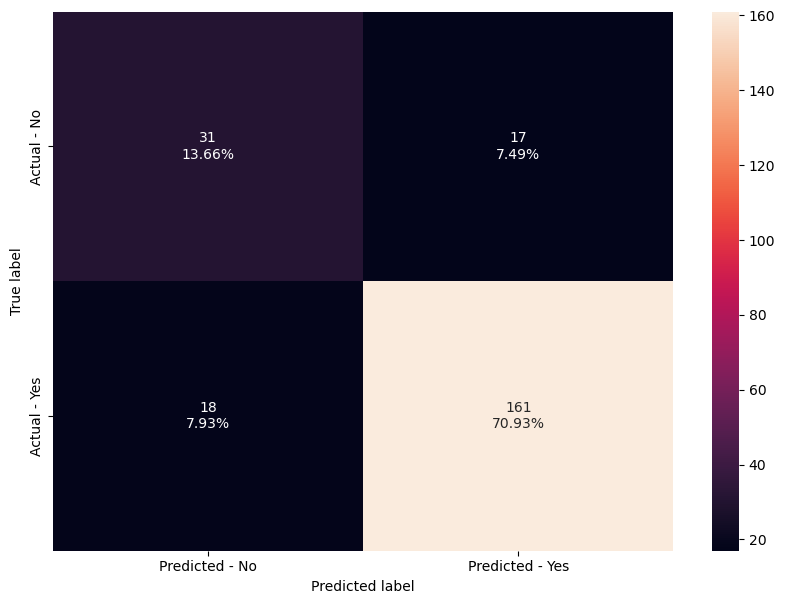

In [41]:
%%time

###### Gradient Boost

gradient_boost=GradientBoostingClassifier(random_state=1)
gradient_boost.fit(X_train,y_train)
                   
get_metrics_score(gradient_boost)

make_confusion_matrix(gradient_boost,y_test)

Accuracy on training set :  0.8601134215500945
Accuracy on test set :  0.8325991189427313
Recall on training set :  0.9558441558441558
Recall on test set :  0.9106145251396648
Precision on training set :  0.8658823529411764
Precision on test set :  0.8810810810810811
F1-Score on training set :  0.9086419753086419
F1-Score on test set :  0.8956043956043956
CPU times: total: 40 s
Wall time: 40.1 s


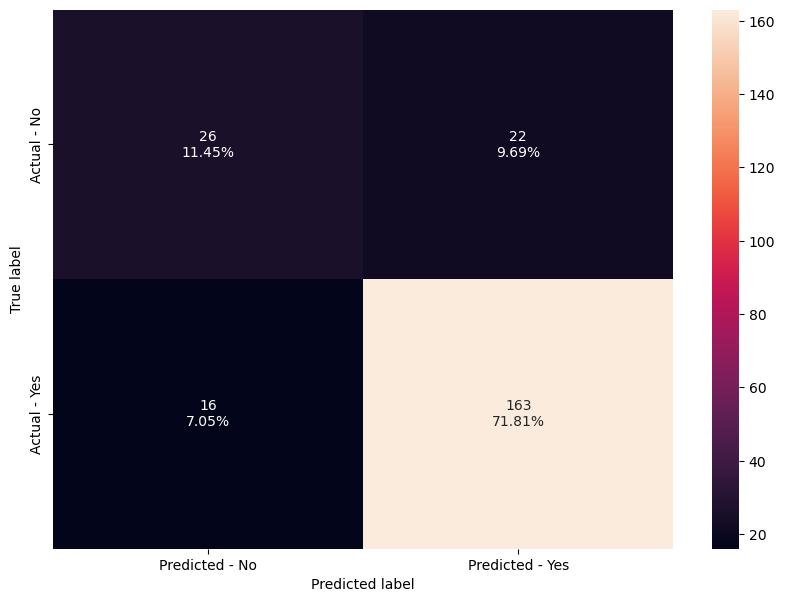

In [42]:
%%time
###### Tuned Gradient Boost

# Create the initial model
base_estimator = DecisionTreeClassifier(max_depth=1)

gb_tuned = GradientBoostingClassifier(init=base_estimator,random_state=1)

parameters = {
    "n_estimators": [20,50,100,150],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(gb_tuned, parameters, scoring=acc_scorer,cv=5)

grid_obj = grid_obj.fit(X_train, y_train)

gb_tuned = grid_obj.best_estimator_

gb_tuned.fit(X_train, y_train)

get_metrics_score(gb_tuned)

make_confusion_matrix(gb_tuned,y_test)

Accuracy on training set :  1.0
Accuracy on test set :  0.8414096916299559
Recall on training set :  1.0
Recall on test set :  0.888268156424581
Precision on training set :  1.0
Precision on test set :  0.9085714285714286
F1-Score on training set :  1.0
F1-Score on test set :  0.8983050847457626
Accuracy on training set :  1.0
Accuracy on test set :  0.8414096916299559
Recall on training set :  1.0
Recall on test set :  0.888268156424581
Precision on training set :  1.0
Precision on test set :  0.9085714285714286
F1-Score on training set :  1.0
F1-Score on test set :  0.8983050847457626
CPU times: total: 2.23 s
Wall time: 5.7 s


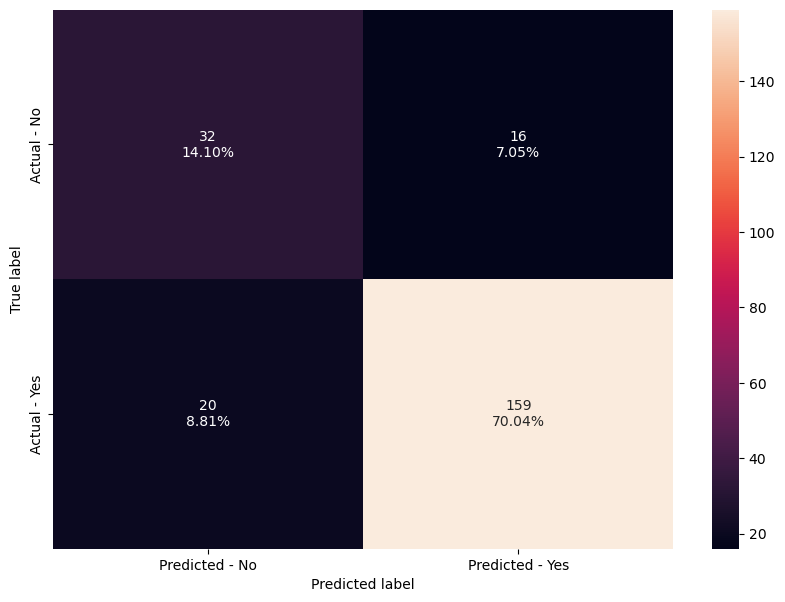

In [43]:
%%time
###### XGBoost

!pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1, eval_metric='logloss')
xgb.fit(X_train,y_train)

xgb_score=get_metrics_score(xgb)

#Calculating different metrics
get_metrics_score(xgb)

#Creating confusion matrix
make_confusion_matrix(xgb,y_test)

Accuracy on training set :  0.9054820415879017
Accuracy on test set :  0.8502202643171806
Recall on training set :  1.0
Recall on test set :  0.9497206703910615
Precision on training set :  0.8850574712643678
Precision on test set :  0.8717948717948718
F1-Score on training set :  0.9390243902439025
F1-Score on test set :  0.9090909090909091
CPU times: total: 15min 35s
Wall time: 1min 29s


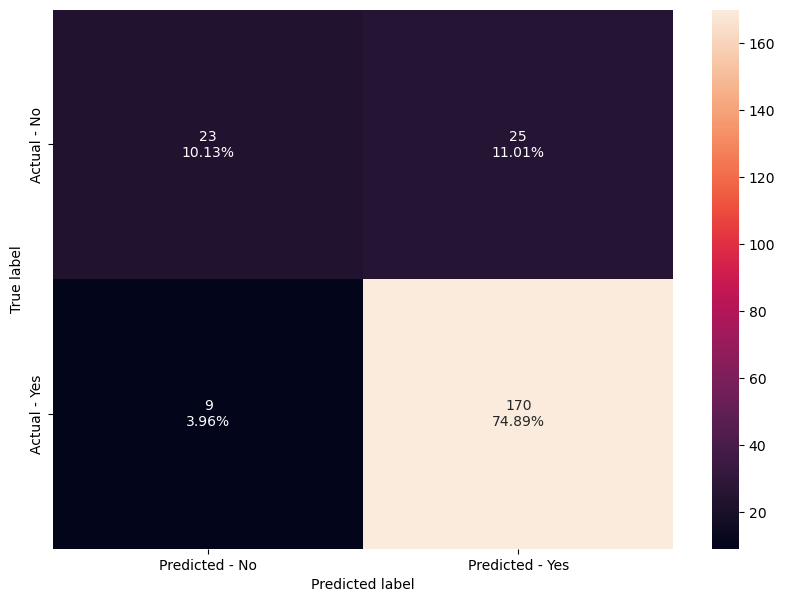

In [44]:
%%time
###### XGBoost Tuned

xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05,0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

get_metrics_score(xgb_tuned)

make_confusion_matrix(xgb_tuned,y_test)

In [45]:
###### Boosting Model Comparisons

# defining list of models
models = [adaboost, adaboost_tuned, gradient_boost, gb_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))
comparison_frame = pd.DataFrame({'Model':['AdaBoost','AdaBoost Tuned', 'Gradient Boost','Gradient Boost Tuned',
                                          'XGBoost','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_F1': f1_train,
                                          'Test_F1': f1_test}) 

comparison_frame.sort_values(by='Test_F1',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
5,XGBoost Tuned,0.91,0.85,1.00,0.95,0.89,0.87,0.94,0.91
2,Gradient Boost,0.97,0.85,1.00,0.90,0.96,0.90,0.98,0.90
3,Gradient Boost Tuned,0.86,0.83,0.96,0.91,0.87,0.88,0.91,0.90
4,XGBoost,1.00,0.84,1.00,0.89,1.00,0.91,1.00,0.90
1,AdaBoost Tuned,0.87,0.83,0.96,0.91,0.88,0.88,0.92,0.89
0,AdaBoost,0.90,0.81,0.96,0.88,0.91,0.89,0.93,0.88


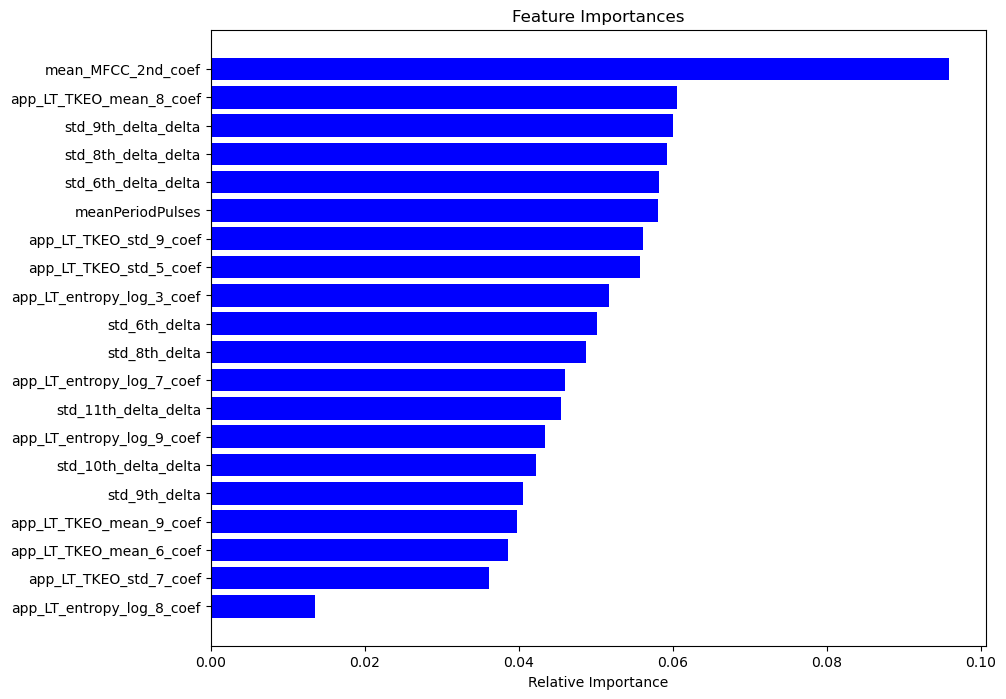

In [46]:
###### Feature Importances

feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()